Importing packages for further use later

In [50]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots in-notebook
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

plt.style.use('fivethirtyeight')

Importing and perfoming exploratory data analysis on the beer.csv

In [3]:
data1 = Path('.', 'data', 'craft-cans','beers.csv') # Works better cross-platform than hard-coding path as a string
beer = pd.read_csv(data1)
beer = beer.drop('Unnamed: 0',1)

beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [4]:
beer.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [5]:
beer.shape

(2410, 7)

In [6]:
beer.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [7]:
beer.loc[:,'style'].value_counts()

American IPA                           424
American Pale Ale (APA)                245
American Amber / Red Ale               133
American Blonde Ale                    108
American Double / Imperial IPA         105
American Pale Wheat Ale                 97
American Brown Ale                      70
American Porter                         68
Saison / Farmhouse Ale                  52
Witbier                                 51
Fruit / Vegetable Beer                  49
Kölsch                                  42
Hefeweizen                              40
American Pale Lager                     39
American Stout                          39
Cider                                   37
German Pilsener                         36
American Black Ale                      36
Märzen / Oktoberfest                    30
Cream Ale                               29
American Amber / Red Lager              29
Czech Pilsener                          28
American Pilsner                        25
Belgian Pal

Clearly, data is missing from the ibu column

In [8]:
beer.isnull().sum()

abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

Importing the breweries.csv and performing exploratory data analysis on it.

In [9]:
data2 = Path('.', 'data','craft-cans', 'breweries.csv')
breweries = pd.read_csv(data2)
breweries = breweries.drop('Unnamed: 0',1)

breweries.head()

,name,city,state
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA


In [10]:
breweries.dtypes

name     object
city     object
state    object
dtype: object

In [11]:
breweries.shape

(558, 3)

In [12]:
breweries.describe()

,name,city,state
count,558,558,558
unique,551,384,51
top,Summit Brewing Company,Portland,CO
freq,2,17,47


In [13]:
breweries.isnull().sum()

name     0
city     0
state    0
dtype: int64

For later use, looking at the most popular styles of beer

In [14]:
most_popular1 = beer.groupby('style').count()
most_popular2 = most_popular1.sort_values(by = 'id', ascending=False)
most_popular2.head()

,abv,ibu,id,name,brewery_id,ounces
style,,,,,,
American IPA,417,301,424,424,424,424
American Pale Ale (APA),239,153,245,245,245,245
American Amber / Red Ale,125,77,133,133,133,133
American Blonde Ale,104,61,108,108,108,108
American Double / Imperial IPA,103,75,105,105,105,105


Now, merging the two dataframes

In [15]:
breweries.loc[:, 'brewery_id'] = breweries.index
beers = beer.merge(breweries, on = 'brewery_id')
beers.head()

,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


Performing exploratory analysis on the merged dataframe

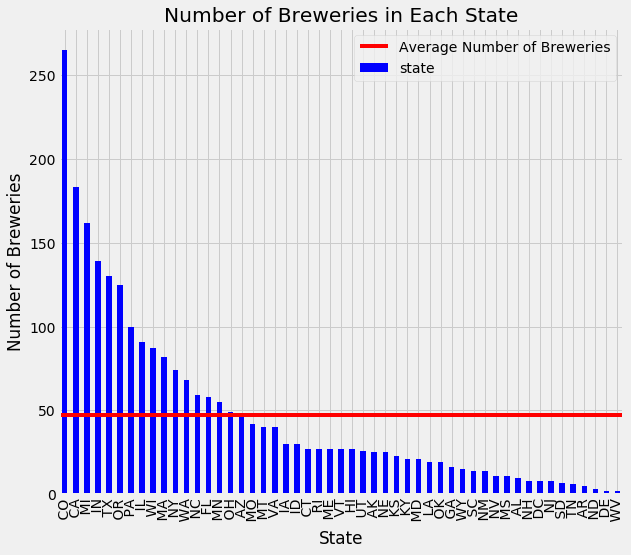

In [16]:
plot1 = beers.state.value_counts().plot(kind = 'bar', title = 'Number of Breweries in Each State', 
                                        colormap='winter',figsize=(9,8))
plot1.set_xlabel('State')
plot1.set_ylabel('Number of Breweries')
meanline = plot1.axhline(beers.state.value_counts().mean(), label = 'Average Number of Breweries', color='red')
plot1.legend();

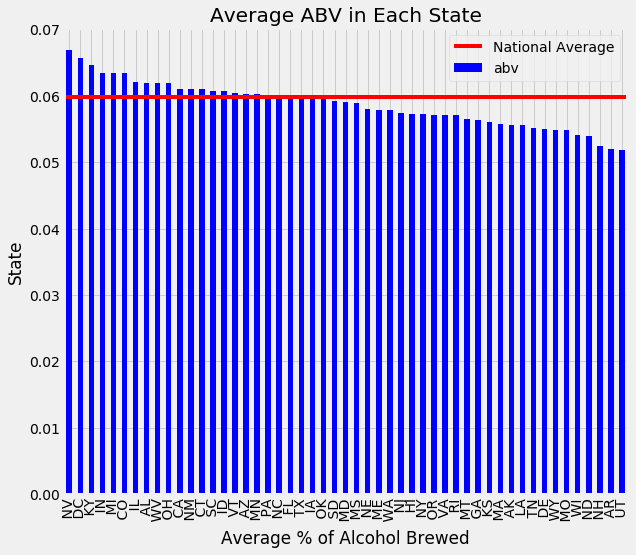

In [17]:
plot2 = beers.groupby('state')['abv'].mean().sort_values(ascending=False).plot(kind = 'bar',
                                                                       title = 'Average ABV in Each State', 
                                                                       color= 'blue',
                                                                      figsize = (9,8))
plot2.set_xlabel('Average % of Alcohol Brewed')
plot2.set_ylabel('State')
meanline2 = plot2.axhline(beers.abv.mean(), color = 'r', label = 'National Average')
plot2.legend();

# Linear Regression

In [18]:
beers.head()

,abv,ibu,id,name_x,style,brewery_id,ounces,name_y,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


In [21]:
beers.dropna(axis=0, inplace=True)

In [22]:
beers.isnull().sum()

abv           0
ibu           0
id            0
name_x        0
style         0
brewery_id    0
ounces        0
name_y        0
city          0
state         0
dtype: int64

In [23]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

feature_cols = ['abv']
X = beers.loc[:,feature_cols]
y = beers.loc[:,'ibu']

linreg.fit(X,y)
y_pred = linreg.predict(X)

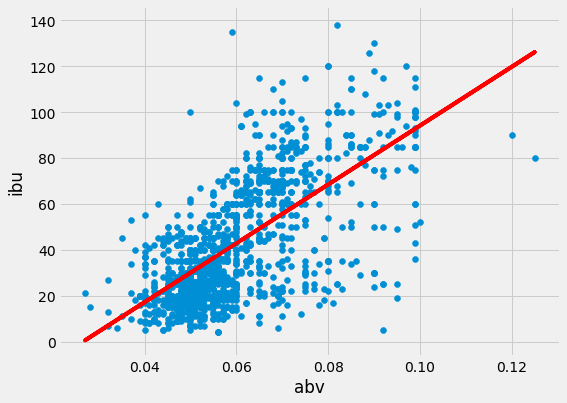

In [37]:
plt.plot(X.values, y_pred, color='red')
plt.scatter(X.values, y)
plt.xlabel('abv')
plt.ylabel('ibu');

In [41]:
print(linreg.intercept_)
print(linreg.coef_)

-34.0676453352
[ 1281.86075709]


In [45]:
linreg.score(X,y)

0.44986855092122924

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y)

null_pred = np.ones(y_test.shape)
null_pred *= y_train.mean()
np.sqrt(metrics.mean_squared_error(y_test, null_pred)) #standard deviation

26.045507996470825